In [4]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [9]:
sam = sam_model_registry["vit_h"](checkpoint="/Users/kerim/dev/SA_BscThesis/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
image = cv2.imread("Data_subset/mvpsp/train/001000/rgb/000000.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

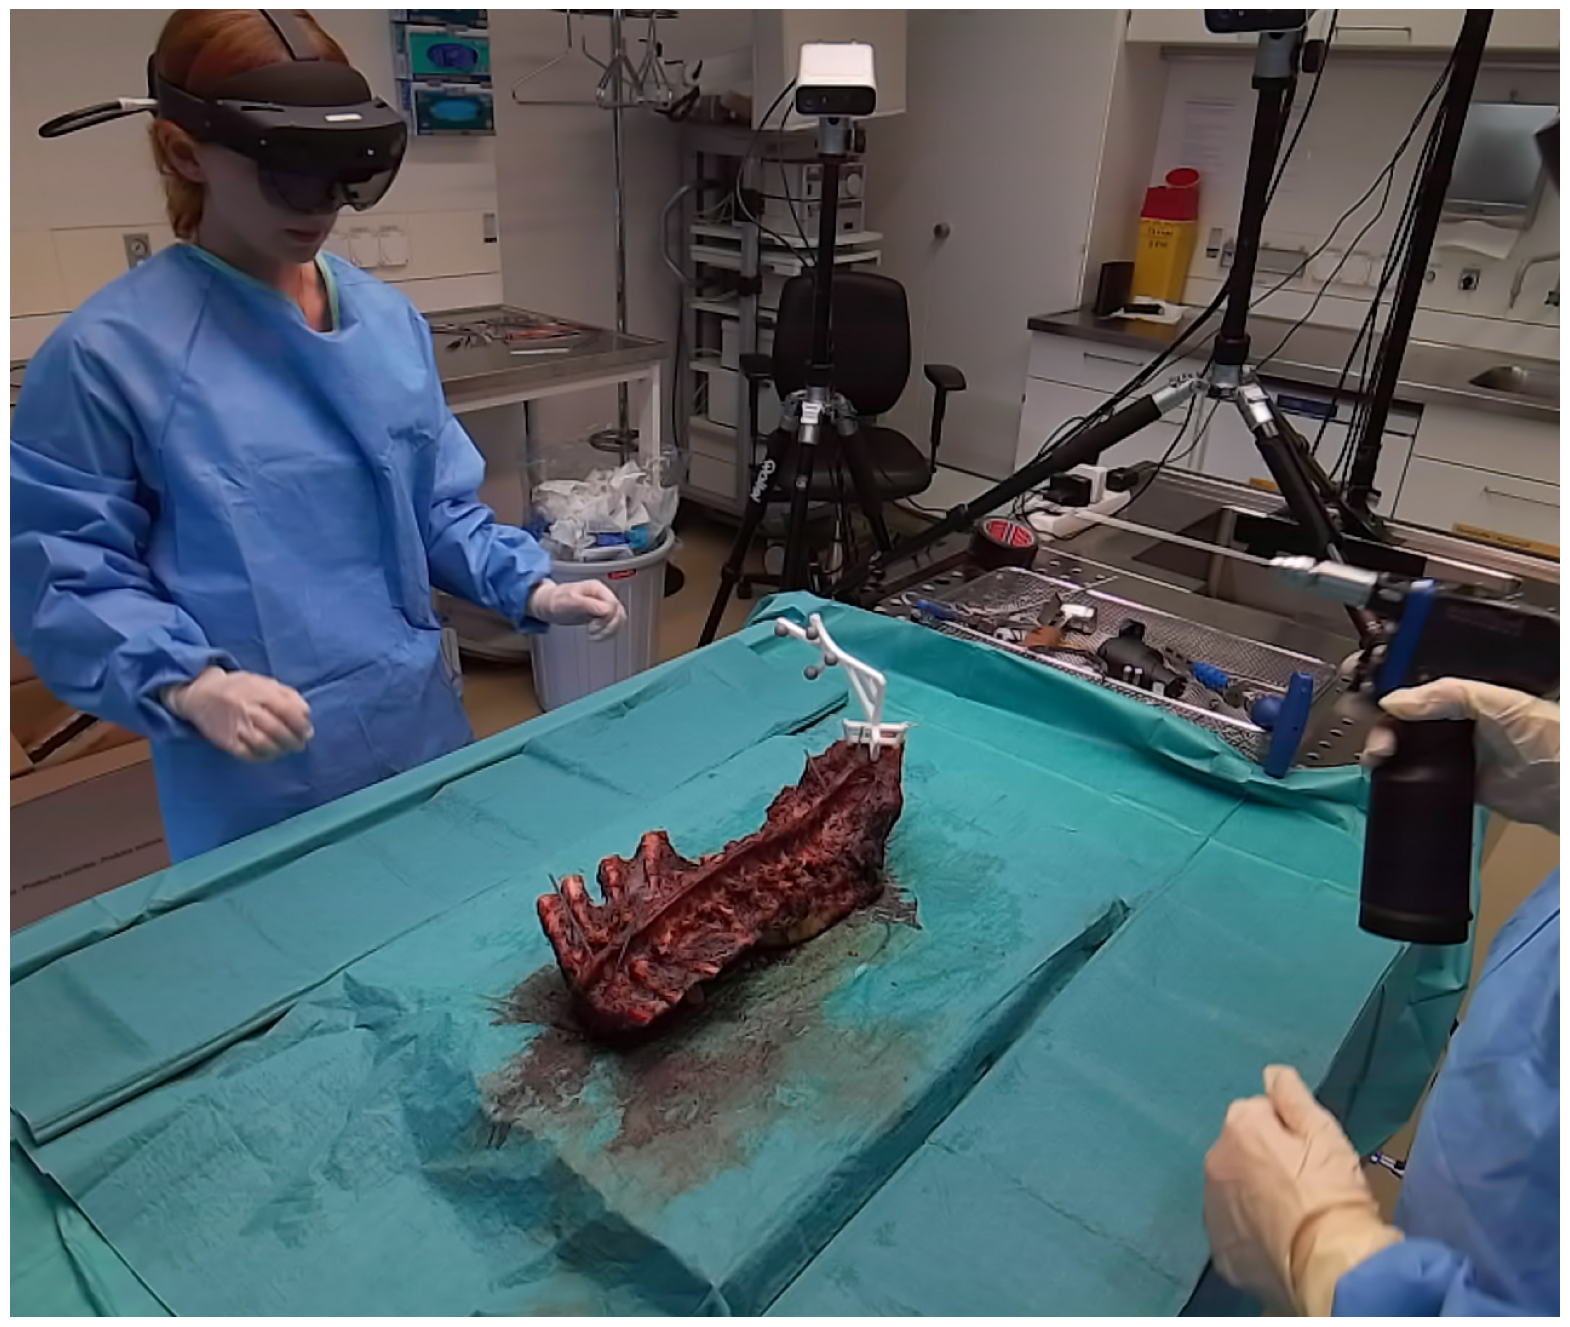

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [10]:
masks = mask_generator.generate(image)

In [12]:
print(len(masks))
print(masks[0].keys())

148
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [13]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

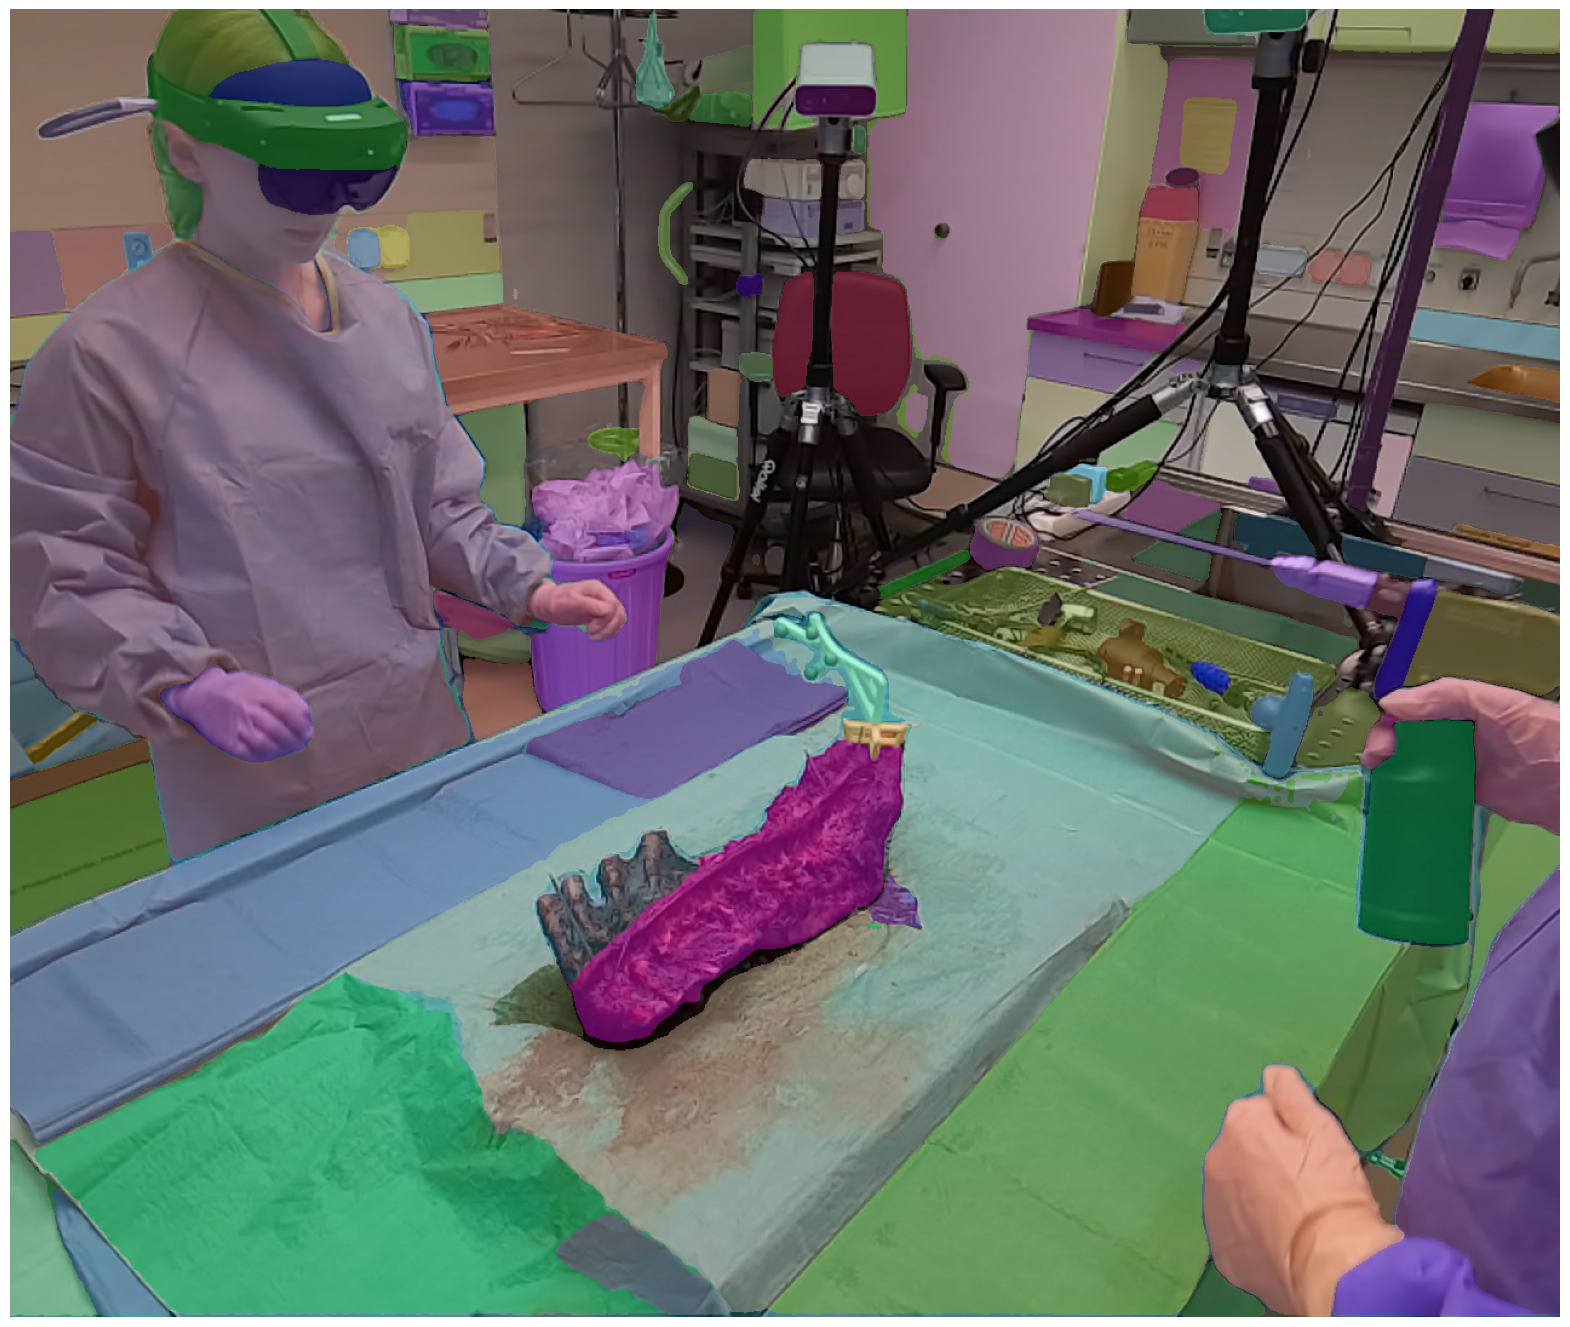

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 